# Task name : Next Word Prediction || September 2021

# Perform by : Mohammed Away Toumi

# Using Tensorflow and Keras library train a RNN , to predict the next word.
## For problem statement and guidance : https://thecleverprogrammer.com/2020/07/20/next-word-prediction-model/

In [2]:
from google.colab import files
from google.colab import drive
from IPython.display import Image
drive.mount('/content/drive/') 

Mounted at /content/drive/


In [2]:
uploaded = files.upload()

Saving t4.png to t4.png


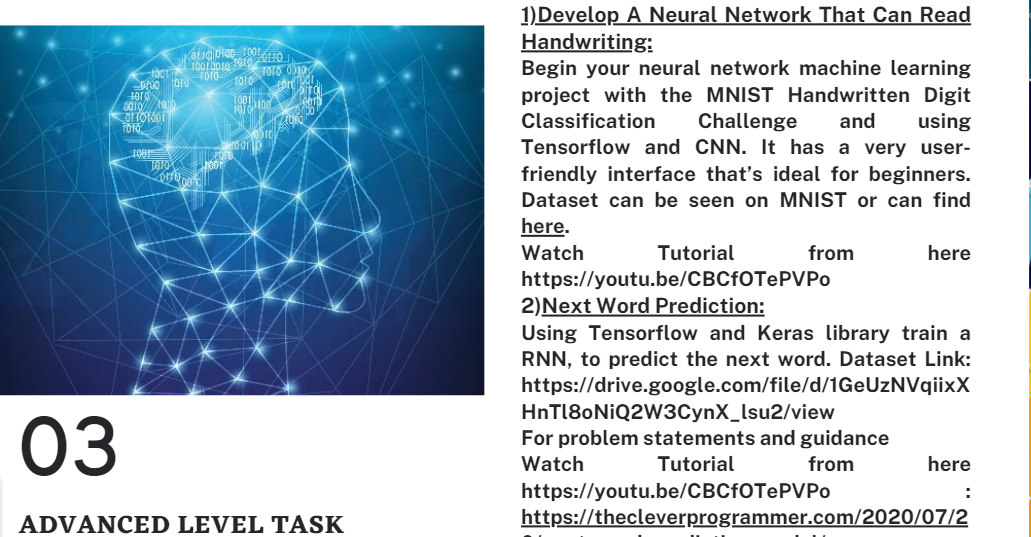

In [3]:
Image('t4.png')

# Dataset : https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view

## Importing libraries

In [37]:
import tensorflow as tf
import numpy as np
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import heapq
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

## Loading Data

In [6]:
# source text
file = open('/content/drive/MyDrive/Colab Notebooks/1661-0.txt', encoding="utf8").read().lower()


In [7]:
print('corpus length:', len(file))

corpus length: 581888


## Cleaning the data

In [12]:
file = open("/content/drive/MyDrive/Colab Notebooks/1661-0.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)
    
print(lines)

['\ufeff\n', "Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle\n", '\n', 'This eBook is for the use of anyone anywhere at no cost and with\n', 'almost no restrictions whatsoever.  You may copy it, give it away or\n', 're-use it under the terms of the Project Gutenberg License included\n', 'with this eBook or online at www.gutenberg.net\n', '\n', '\n', 'Title: The Adventures of Sherlock Holmes\n', '\n', 'Author: Arthur Conan Doyle\n', '\n', 'Release Date: November 29, 2002 [EBook #1661]\n', 'Last Updated: May 20, 2019\n', '\n', 'Language: English\n', '\n', 'Character set encoding: UTF-8\n', '\n', '*** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***\n', '\n', '\n', '\n', 'Produced by an anonymous Project Gutenberg volunteer and Jose Menendez\n', '\n', '\n', '\n', 'cover\n', '\n', '\n', '\n', 'The Adventures of Sherlock Holmes\n', '\n', '\n', '\n', 'by Arthur Conan Doyle\n', '\n', '\n', '\n', 'Contents\n', '\n', '\n', '   I.     A Sc

In [13]:
data = ""

for i in lines:
    data = ' '. join(lines)
    
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

" Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.net   Title: The Adventures of Sherl"

In [14]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

new_data[:500]

' Project Gutenberg s The Adventures of Sherlock Holmes  by Arthur Conan Doyle  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever   You may copy it  give it away or re use it under the terms of the Project Gutenberg License included with this eBook or online at www gutenberg net   Title  The Adventures of Sherlock Holmes  Author  Arthur Conan Doyle  Release Date  November 29  2002  EBook  1661  Last Updated  May 20  2019  Language  English  Charact'

In [15]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)
data[:500]

"Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle This eBook is for the use anyone anywhere at no cost and with almost restrictions whatsoever. You may copy it, give it away or re-use under terms Gutenberg License included this online www.gutenberg.net Title: Holmes Author: Release Date: November 29, 2002 [EBook #1661] Last Updated: May 20, 2019 Language: English Character set encoding: UTF-8 *** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES SHERLOCK HOLMES Prod"

In [18]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[838, 3083, 56, 322, 57, 1523, 15, 95, 839, 3084]

In [19]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  17678


array([[ 838, 3083],
       [3083,   56],
       [  56,  322],
       [ 322,   57],
       [  57, 1523],
       [1523,   15],
       [  15,   95],
       [  95,  839],
       [ 839, 3084],
       [3084, 3085]])

In [20]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

In [21]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [ 838 3083   56  322   57]
The responses are:  [3083   56  322   57 1523]


In [23]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

8931


In [24]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Creating the Model

In [25]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 10)             89310     
_________________________________________________________________
lstm (LSTM)                  (None, 1, 1000)           4044000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dense (Dense)                (None, 1000)              1001000   
_________________________________________________________________
dense_1 (Dense)              (None, 8931)              8939931   
Total params: 22,078,241
Trainable params: 22,078,241
Non-trainable params: 0
_________________________________________________________________


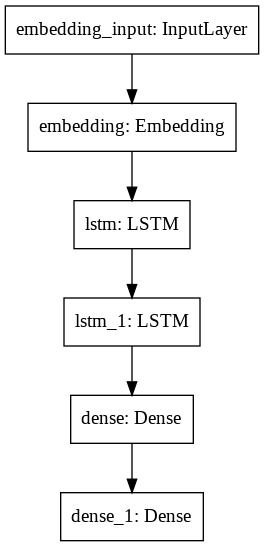

In [27]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

## Compile The Model

In [39]:
model.compile(loss="categorical_crossentropy", optimizer= Adam(lr=0.001))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


## Fit The Model

In [40]:
model.fit(X, y, epochs=150, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/150
277/277 [==============================] - 83s 287ms/step - loss: 8.8727

Epoch 00001: loss improved from inf to 8.87269, saving model to nextword1.h5
Epoch 2/150
277/277 [==============================] - 77s 279ms/step - loss: 8.3707

Epoch 00002: loss improved from 8.87269 to 8.37068, saving model to nextword1.h5
Epoch 3/150
277/277 [==============================] - 77s 278ms/step - loss: 8.0741

Epoch 00003: loss improved from 8.37068 to 8.07408, saving model to nextword1.h5
Epoch 4/150
277/277 [==============================] - 77s 276ms/step - loss: 7.8088

Epoch 00004: loss improved from 8.07408 to 7.80884, saving model to nextword1.h5
Epoch 5/150
277/277 [==============================] - 77s 276ms/step - loss: 7.5842

Epoch 00005: loss improved from 7.80884 to 7.58415, saving model to nextword1.h5
Epoch 6/150
277/277 [==============================] - 76s 273ms/step - loss: 7.3432

Epoch 00006: loss improved from 7.58415 to 7.34316, saving model to nextword1.h5
Ep

## Prediction


For the prediction notebook, we will load the tokenizer file which we have stored in the pickle format. We will then load our next word model which we have saved in our directory. We will use this same tokenizer to perform tokenization on each of the input sentences for which we should make the predictions on. After this step, we can proceed to make predictions on the input sentence by using the saved model.